# <center>Machine Learning for Finance </center>

## Etudiant 
<h3><font color="blue">Issame SARROUKH</font></h3>
<h3><font color="blue">Ouassim SEBBAR</font></h3>

## Sommaire: 

1. [Boostrap, Blending (averaging), Jackkknife](#part1)
    1. [Improve bias (accuracy)](#part1.a)
    2. [Uncertainty quantification](#part1.b)
    
2. [Interpretability](#part2)
    1. [Data and baseline model](#part2.a)
    2. [Interpretability through visualisation](#part2.b)
        1. Partial dependence plot
        2. Individual Conditional Expectation
    3. [From visualisation to Global Importance](#part2.c)
        1. Mean Decrease Impurity
        2. Permutation Feature Importance
    4. [From Global to Local importance](#part2.d)
        1. SHappley Additive exPlaination (SHAP)
    

# 1. Boostrap, Blending (averaging), Jackknife <a name="part1"></a>

Les données sources sont issues de la plateforme Kaggle : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Les données décrivent (presque) toutes les caractérisques des maisons à Ames, Iowa. Il y a 79 variables et elles sont décrites sur le lien ci-dessus. Les données sont présentes dans le dossier ```data/``` à la racine. Il s'agit du fichier ```data_house.csv```.  Le but est de réussir à prédire le prix final de chaque maison. 

### <span style="color:red">A vous de jouer !</span> 

Importer les données, analyser et supprimer les outliers (maison trop grande, prix trop bas/élevé, ...)

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# open csv file 
data = pd.read_csv("../data/data_house.csv")

In [3]:
# read description 
f = open("data_description.txt", "r") 
print("data description")
print(f.read())

data description
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Densit

In [4]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# data columns 
print("Data columns") 
print(*data.columns, sep=', ')

Data columns
Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice


<AxesSubplot:>

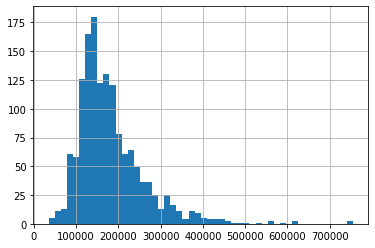

In [6]:
# sale price distribution 
data["SalePrice"].hist(bins=50)

Il parrait qu'on a des valeurs aberrantes dans les données. regardant la corrélation avec les autres variables 

Pearson coeff 0.2638433538714057


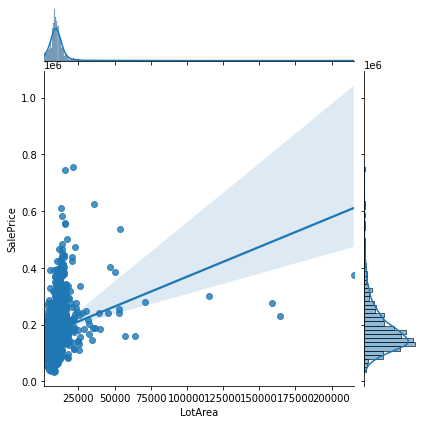

In [7]:
# join plot between lot area and sale price 
import scipy.stats as stats
print("Pearson coeff", stats.pearsonr(data["LotArea"], data["SalePrice"])[0])
plot = sns.jointplot(x='LotArea', y="SalePrice", data=data, kind="reg")

a partir de 5200, on a des valeurs aberrantes, on regarde particulièrement ces points

In [8]:
# filter on values greater than 51000
df = data.loc[data["LotArea"]>=51000]

Pearson coeff 0.1401903623672941


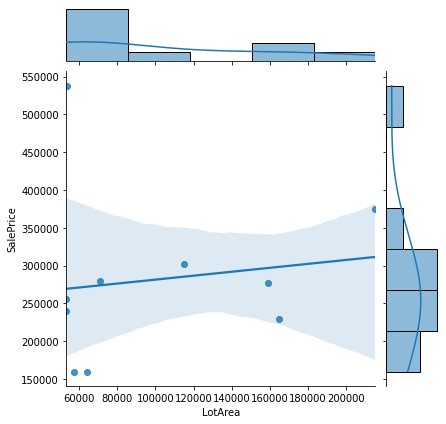

In [9]:
# see the correlation between the value of lot area greater than 5100
print("Pearson coeff", stats.pearsonr(df["LotArea"], df["SalePrice"])[0])
sns.jointplot(x='LotArea', y="SalePrice", data=df, kind="reg")

Il parrait qu'il y une valeur aberrante à 550000

In [10]:
# remove the outlier 
value = df.loc[df["SalePrice"]>500000, "Id"].iloc[0] 
data = data.loc[data["Id"]!=value]

Pearson coeff 0.6619516675347021


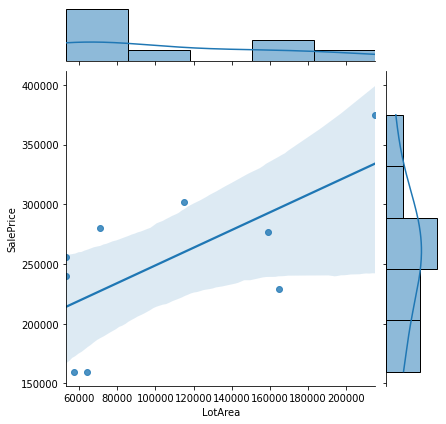

In [11]:
# see haw the correaltion coeff has changed 
df = data.loc[data["LotArea"]>=51000]
print("Pearson coeff", stats.pearsonr(df["LotArea"], df["SalePrice"])[0])
sns.jointplot(x='LotArea', y="SalePrice", data=df, kind="reg")

Le coefficient de corrélation à augmenter

<AxesSubplot:>

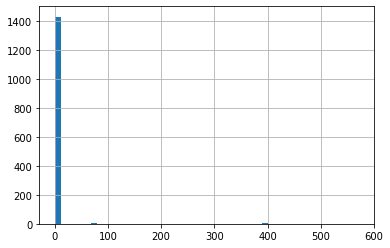

In [12]:
# describe lowqualfinsf
data['LowQualFinSF'].hist(bins=50)

Il parrait que les valeurs manquantes sont remplacées par zéro

On regarde la corrélation pour des valeurs non nulles avec le prix de vente

In [13]:
len(data)

1459

Pearson coeff 0.3000750165550131


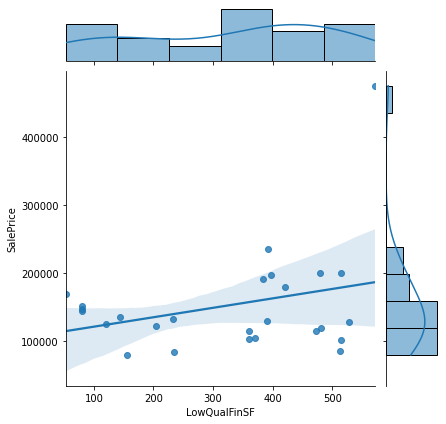

In [14]:
# see the correlation for strictly positive values 
df = data[data['LowQualFinSF'] > 0]
print("Pearson coeff", stats.pearsonr(df["LowQualFinSF"], df["SalePrice"])[0])
sns.jointplot(x='LowQualFinSF', y="SalePrice", data=df, kind="reg")

Il parrait qu'il y a une unique valeur abberante du prix de ventes, c'est la valeur qu'on va enlever. 

In [15]:
# removing the oulier 
value = df.loc[df["SalePrice"] > 400000, "Id"].iloc[0]
data = data.loc[data["Id"]!=value]

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

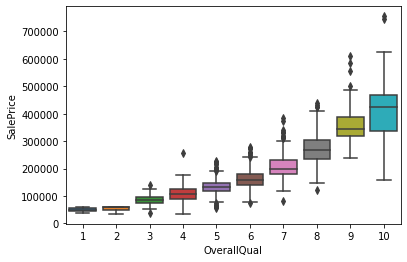

In [16]:
# see the correlation between the overall quality and sales price 
sns.boxplot(data=data, x='OverallQual' , y='SalePrice')

Il y a une forte corrélation entre OverallQual et SalePrice

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

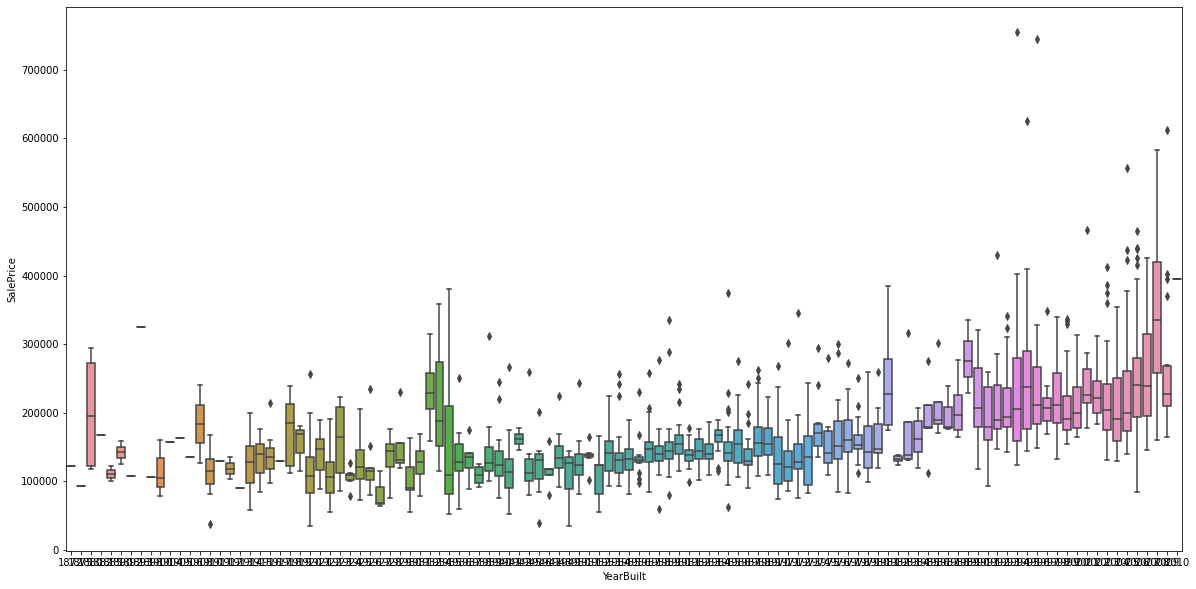

In [17]:
# see the influence of year when the hoose was built with the sale price 
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=data, x='YearBuilt', y='SalePrice')

Il parrait que cette variable n'influence pas beaucoup le prix de vente

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

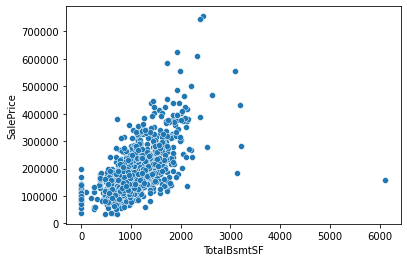

In [18]:
# relationship between total bsmt sf and sale price 
sns.scatterplot(data=data, x='TotalBsmtSF', y="SalePrice")

Les valeurs en zéro remplace les valeurs manquantes, on remarque un point abberant au 6000

In [19]:
# remove outlier 
value = data.loc[data['TotalBsmtSF']>=6000, "Id"].iloc[0] 
data = data.loc[data["Id"]!=value]

On regarde la corrélation entre les variables

<AxesSubplot:>

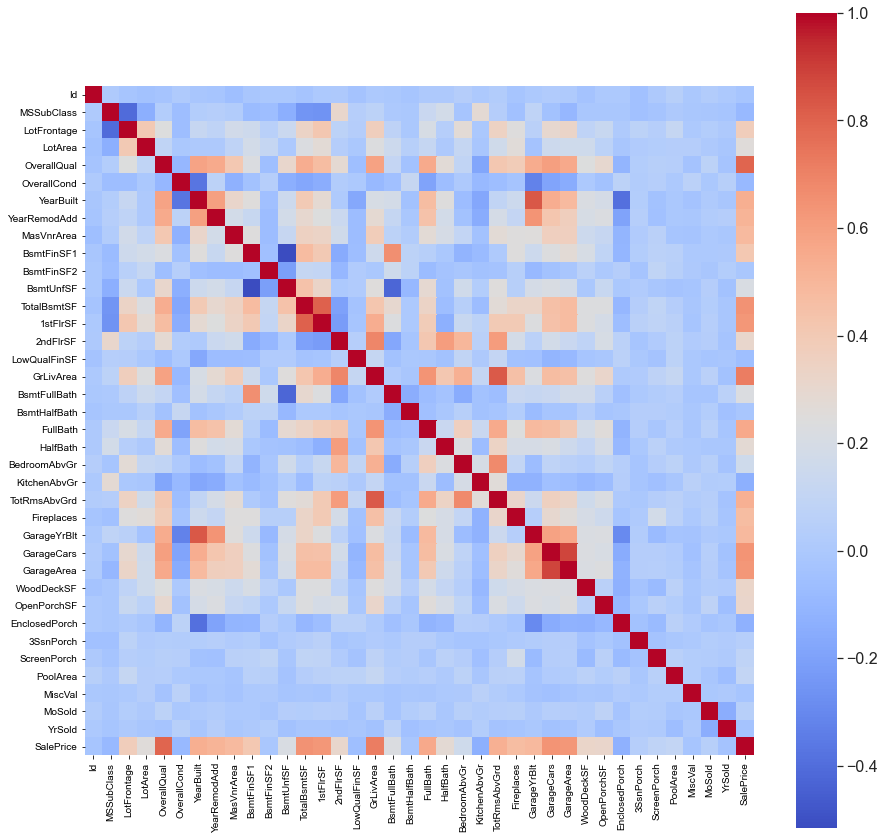

In [20]:
# correlation matrix 
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.45)
sns.heatmap(data.corr(), square=True,cmap='coolwarm')

regardant les variables les plus corrélées avec le prix de vente

In [21]:
# see the variables that are the most correlated with sale price 
corrs = data.corr()["SalePrice"].sort_values(ascending = False).iloc[0:11].to_frame()
cmap = sns.light_palette("seagreen", as_cmap = True)
variables = list(corrs.index)
corrs.iloc[1:].style.background_gradient(cmap = cmap)

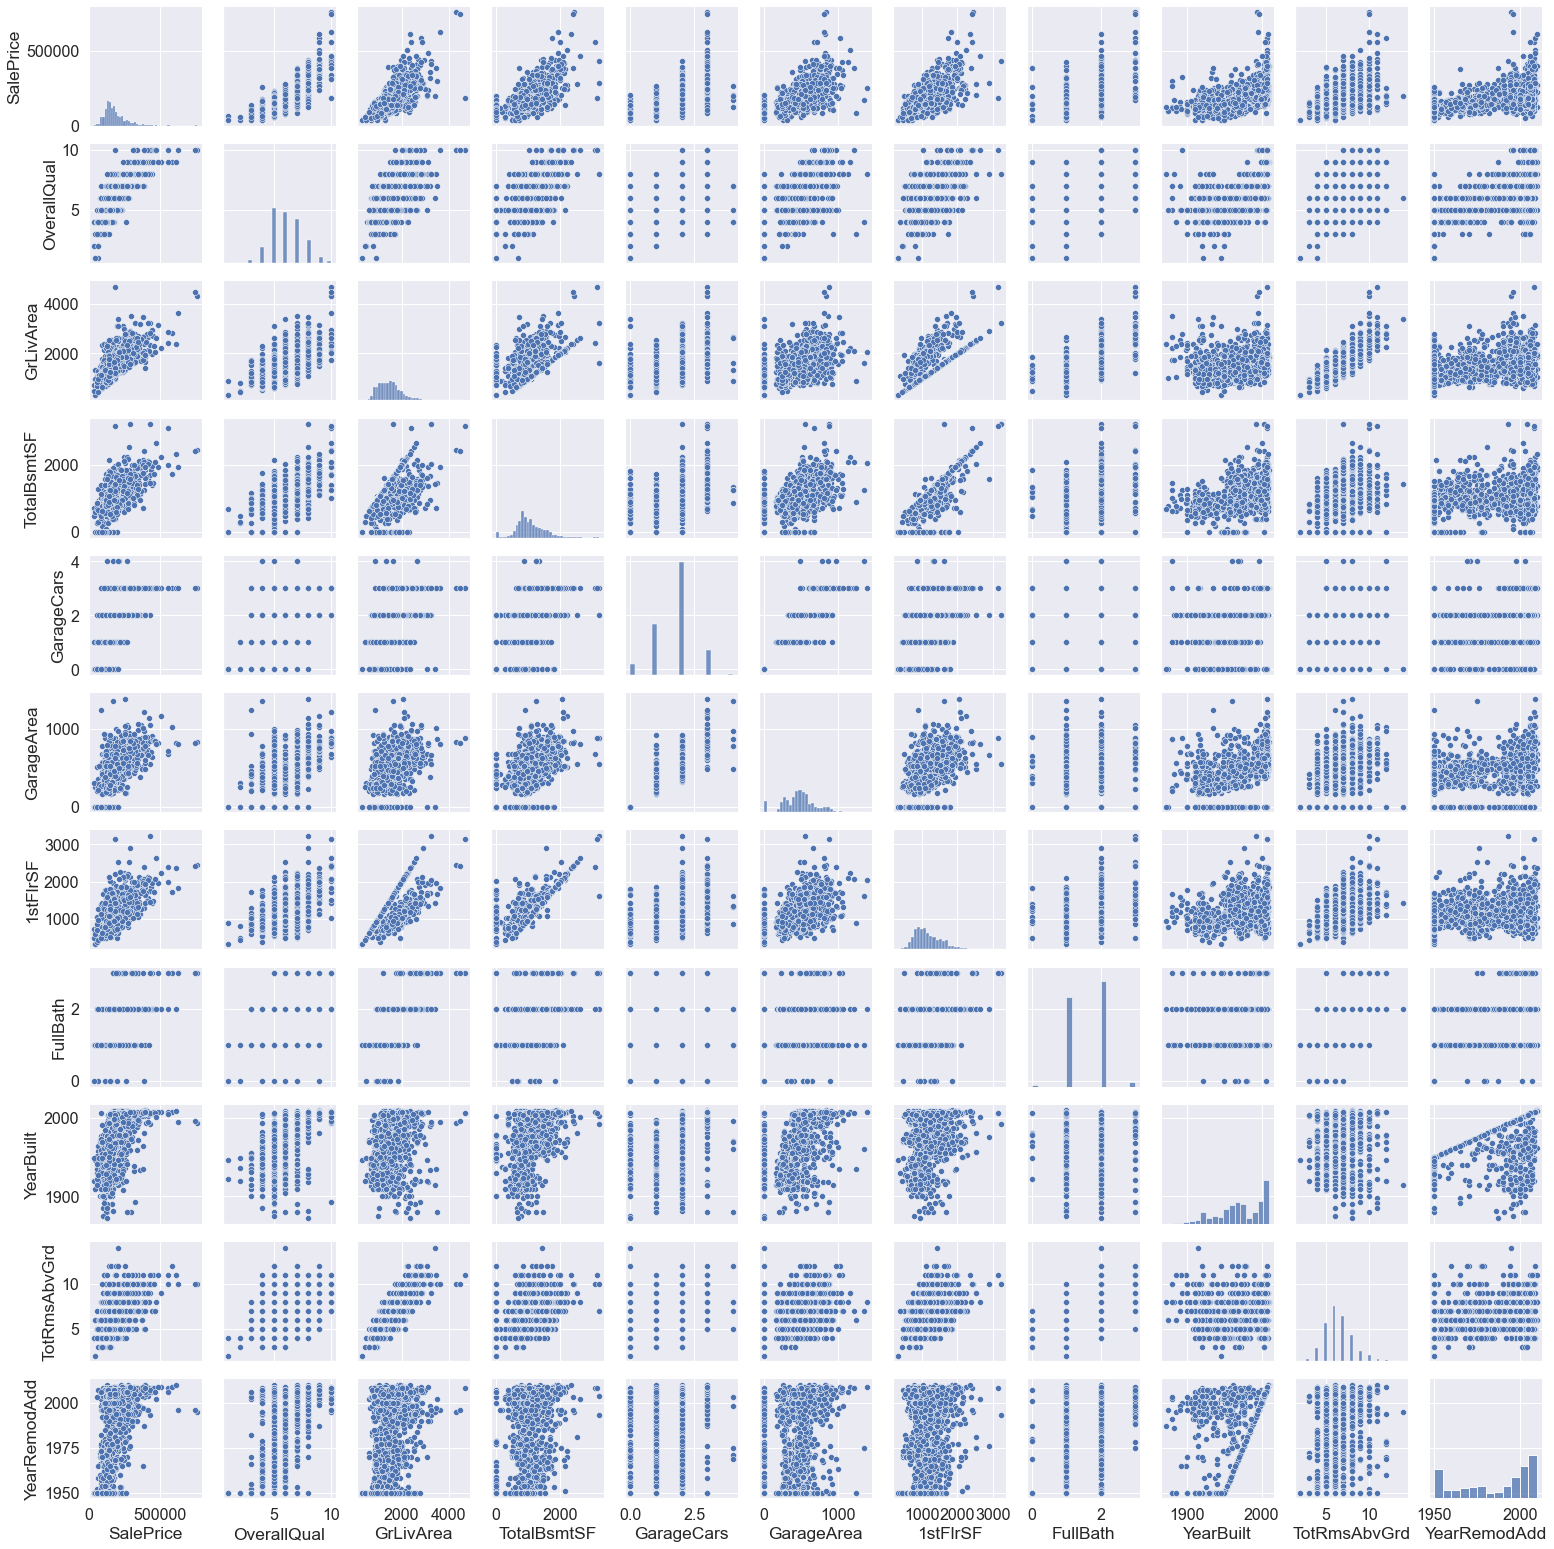

In [22]:
# plot correlation plots 
sns.pairplot(data[variables], height = 2)

Nous pouvons clairement voir les variables importantes et que nous avons résolu le problème des valeurs aberrantes. Cela nous permet également de voir la relation entre la variable à prédire et les variables explicatives. 

Nous pouvons également analyser d'autres variables pour tirer d'autres conclusions ! 

### <span style="color:red">A vous de jouer !</span> 

Compléter intelligemment les valeurs manquantes et encoder les variables catégorielles

In [23]:
# import missing lines 
import missingno as msno

In [24]:
# select only variables with missing values 
missing = (data.isna().sum(axis=0))
missing = missing[missing>0]
columns = list(missing.index)

<AxesSubplot:>

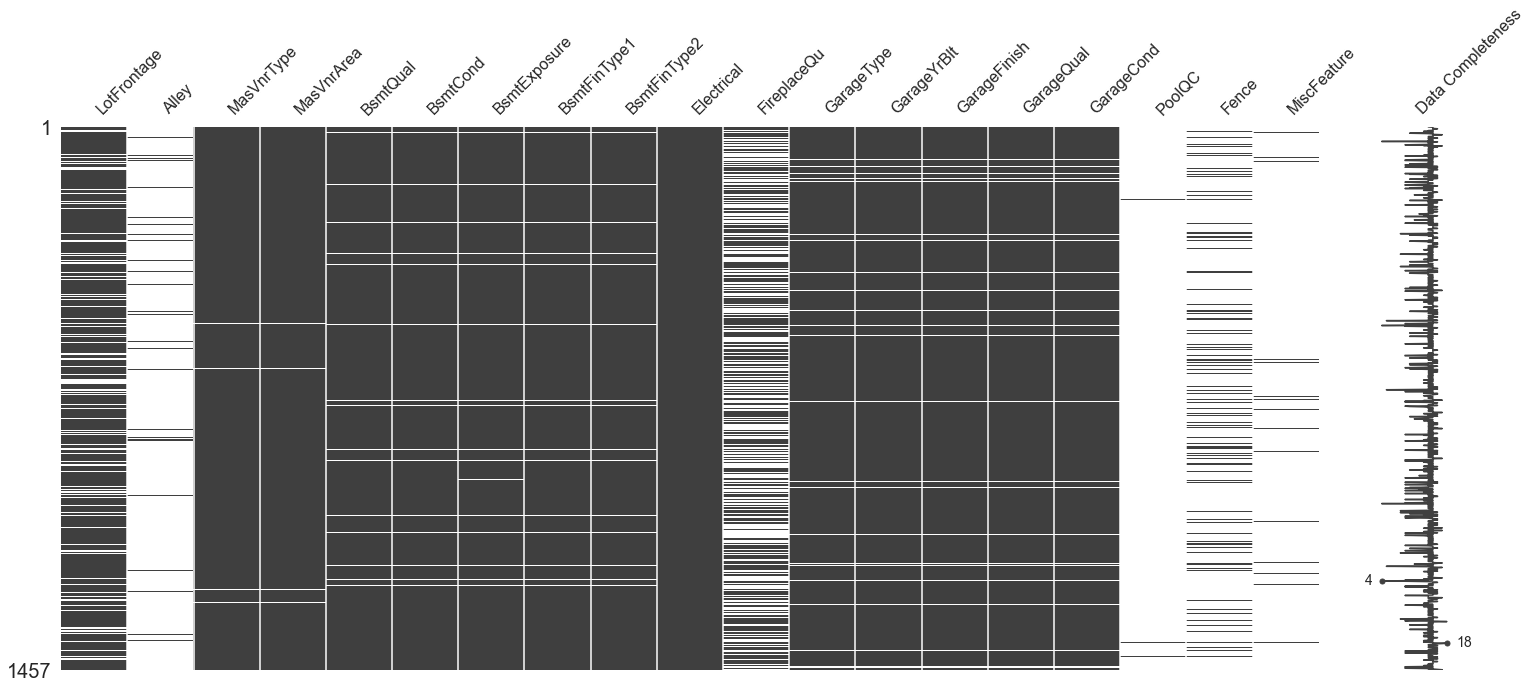

In [25]:
# plot missing values 
msno.matrix(data[columns], labels=True)

On remarque qu'il y a des variables avec trop de valeurs manquantes 

<AxesSubplot:>

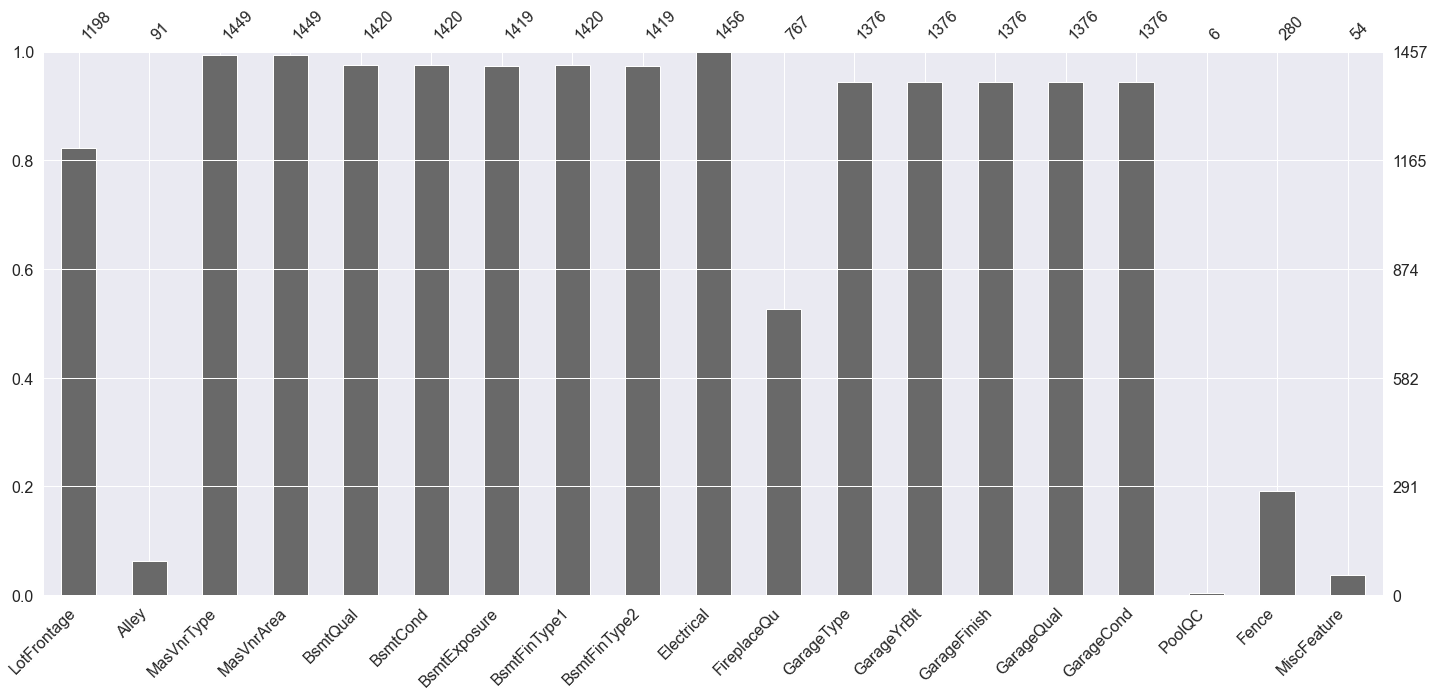

In [26]:
# missing value bars 
msno.bar(data[columns], labels=True)

In [27]:
# table of missing values 
(data[columns].isna().sum(axis=0)/len(data)).sort_values(ascending=False).to_frame().rename(columns={0:"missing"}).style.format("{:.2%}")

PoolQC NA correspond à aucune picine

MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond ont une description similaire, on replace les valeurs manquantes par "None"

In [28]:
# filling with None 
columns = ["PoolQC", "MiscFeature", "Alley", "FireplaceQu", "GarageType", 
           "GarageType","Fence", "GarageFinish", "GarageQual", "GarageCond"]
data[columns] = data[columns].fillna("None")

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

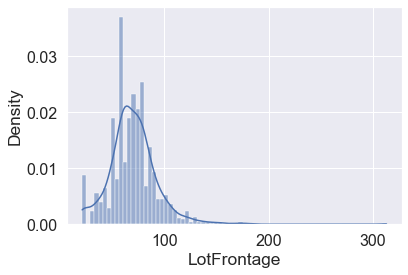

In [29]:
# see the density of lot Frontage
sns.histplot(data['LotFrontage'], stat="density", kde=True) 

la distribution est très asymétrique, avec beaucoup de valeurs extrêmes, on replace les valeurs manquantes par la médiane 

on peut se baser sur la variable "Neighborhood" puisque les maisons dans le voisinage auront des valeurs proches de LogFrontage

In [30]:
# fill missing value with the median for LotFrontage based on Neighborhood 
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageYrBlt, GarageArea and GarageCars, nous remplaçons ces valeurs manquantes par un zéro correspondant à l'absence de garage, à la surface nulle, au nombre nul de voitures

In [31]:
# replace values with zero 
columns = ['GarageYrBlt', 'GarageArea', 'GarageCars'] 
data[columns] = data[columns].fillna(0)

on va mettre ces variables à zéro BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath car pas de sous-sol

In [32]:
# replae value with zero 
columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
data[columns] = data[columns].fillna(0)

Ces catégories BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 sont liées au sous-sol, on les replace par None

In [33]:
# replace value with None 
columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
data[columns] = data[columns].fillna("None")

Le type de placage en maçonnerie est probablement nul car il n'est pas disponible pour ces maisons, nous l'avons mis à None, et MasVnrArea à zéro.

In [34]:
# replace Value with None
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [35]:
# Number of missing value for the variable Electrical 
data["Electrical"].isna().sum()

1

Une seule valeur manquante de la variable Electrical

<AxesSubplot:>

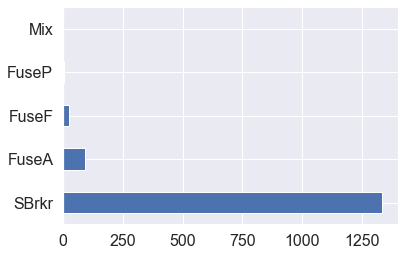

In [36]:
# plot each group in the form of a bar plot 
data["Electrical"].value_counts().plot.barh()

La catégorie "SBrkr" est dominante, nous la remplaçons donc par la catégorie la plus fréquente

In [37]:
# replace with mode 
data["Electrical"] = data["Electrical"].fillna(data['Electrical'].mode()[0])

In [38]:
# no missing values in data
data.isna().sum().sum()

0

Les valeurs manquantes sont traitées

### <span style="color:red">A vous de jouer !</span> 

Séparer la variable cible (Sale price) de la base de données, puis splitter les données en 2 jeux de données pour le train et le test.

*Utiliser la fonction train_test_split de sklearn*

In [39]:
# split data to train and test 
from sklearn.model_selection import train_test_split
X = data.copy() 
y = X.pop("SalePrice") 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color:red">A vous de jouer !</span> 

Evaluer les performances de cinqs modèles différents au choix sur le jeu de test. Stocker les prédictions de chaque modèle dans un dictionnaire "preds" de format suivant :

preds = dict()

preds['model1'] = model1.predict(X_test)

On examine les variables

In [40]:
# import usefull libraries 
import numpy as np

In [41]:
# see numerical variables 
for column in data.columns:
    n  = data[column].nunique()
    if n > 15:
        print(column, n) 

Id 1457
LotFrontage 113
LotArea 1070
Neighborhood 25
YearBuilt 112
YearRemodAdd 61
Exterior2nd 16
MasVnrArea 325
BsmtFinSF1 635
BsmtFinSF2 144
BsmtUnfSF 779
TotalBsmtSF 720
1stFlrSF 751
2ndFlrSF 414
LowQualFinSF 23
GrLivArea 858
GarageYrBlt 98
GarageArea 439
WoodDeckSF 273
OpenPorchSF 200
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 74
MiscVal 21
SalePrice 661


In [42]:
# categorical variables categories 
for column in data.columns:
    n  = data[column].nunique()
    if n <= 15:
        print(column, data[column].unique()) 

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley ['None' 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'

Les variables numériques associées aux variables catégorielles sont dans le bon ordre, pour faciliter la tâche nous utilisons OneHotEncoding pour les variables catégorielles de type string, car nous ne connaissons pas l'ordre de ces catégories sinon nous utiliserions LabelEnconding

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

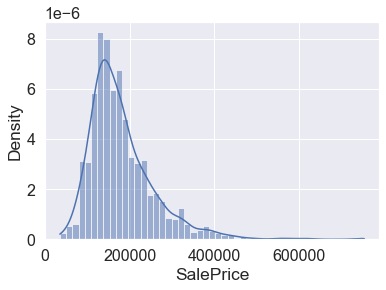

In [43]:
# density of sale prices 
sns.histplot(data['SalePrice'], stat="density", kde=True) 

Elle a une asymétrie positive 

nous aurions pu faire une transformation x -> log(x+1), mais cela n'est pas demandé, et cette asymétrie est aussi observée pour les variables.

In [44]:
# categorical columns 
cat_columns = list(X_train.select_dtypes("object").columns )

In [45]:
# robust scaler for scaling data 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_num = X_train.drop(columns=cat_columns)
X_train_cat = X_train[cat_columns]
X_test_num = X_test.drop(columns=cat_columns)
X_test_cat = X_test[cat_columns]  
X_train_num[X_train_num.columns] = scaler.fit_transform(X_train_num)
X_test_num[X_test_num.columns] = scaler.transform(X_test_num) 

In [46]:
# import one hot encoder 
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [47]:
# fit transform on train data 
X_train_cat = pd.DataFrame(onehot.fit_transform(X_train_cat), columns = onehot.get_feature_names(), index=X_train_cat.index) 

In [48]:
# transform on test data 
X_test_cat = pd.DataFrame(onehot.transform(X_test_cat), columns = onehot.get_feature_names(), index=X_test_cat.index) 

In [49]:
# concatenate numerical and encoded variables 
X_train_dumm = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_dumm = pd.concat([X_test_num, X_test_cat], axis=1)  

In [50]:
# import usefulll libraries 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor


Nous choisissons des modèles avec des paramètres par défaut sans essayer d'améliorer les performances par recherche sur grille ou recherche aléatoire car ce n'est pas le but de l'exercice

In [51]:
# compute rmse 
def rmse(y_true, y_pred):
    return np.sqrt(((y_true-y_pred)**2).mean())

In [52]:
# test random forest, extratrees xgboost, lasso and ridge 
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
et = ExtraTreesRegressor(n_jobs=-1, random_state=42)
xgb = XGBRegressor(n_jobs=-1, random_state=42)
lasso = Lasso(random_state=42)
rg = Ridge(random_state=42)
models = [rf, et, xgb, lasso, rg]
names =  ["Random Forest", "Extra Trees", "Xgboost", "Lasso", 'Ridge']
models = dict(zip(names, models))

In [53]:
# return the score for each model 
preds = dict()
for name, model in models.items(): 
    model.fit(X_train_dumm.values, y_train)
    preds[name] = model.predict(X_test_dumm.values)
    print(name, rmse(y_test, preds[name]))

Random Forest 25263.659477696765
Extra Trees 25978.394298337415
Xgboost 24663.844014724742
Lasso 29776.250179549323
Ridge 26198.570181949013


c:\users\issam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225081204347.28488, tolerance: 705429556.0439818
  positive)


## Improve bias (accuracy)

### <span style="color:red">A vous de jouer !</span> 

Améliorer les performances en aggrégant par moyenne ou médiane les prédictions des différents modèles

In [54]:
# agregate result with mean 
y = np.zeros(y_test.shape[0])
for name, pred in preds.items():
    y += preds[name] 
y = y/len(preds.keys())
    

In [55]:
# return result 
print(rmse(y_test, y))

22506.556863665242


### <span style="color:red">A vous de jouer !</span> 

Améliorer les performances en utilisant une agrégation pondérée de vos modèles. Essayez plusieurs poids, et chercher les plus performants. Comment faire pour trouver des poids optimaux ?

In [56]:
# import usefull libraries 
from itertools import product

In [57]:
# select weights 
w = np.linspace(0, 1, num=11, endpoint=True)

In [58]:
# find the best weights with 0.1 precision 
y = np.array(list(preds.values()))
minimum = np.inf
wm = np.zeros((5, 1))
for weights in product(*5*[w]):
    weights = np.array(weights).reshape(-1, 1)
    if weights.sum()==1:
        y_pred = (weights*y).sum(axis=0) 
        score = rmse(y_test, y_pred)
        if score <= minimum:
            wm = weights
            minimum = score 

In [59]:
# obtain predictions 
y_pred = (wm*y).sum(axis=0) 

In [60]:
# compute score 
score = rmse(y_test, y_pred)
score 

21874.40731463267

### <span style="color:red">A vous de jouer !</span> 

**Bonus:** Utiliser scipy.optimize afin de trouver la pondération optimale.

In [61]:
# boundaries conditions, the weights must be positive and their sum equal one 
cons = ({'type': 'eq', 'fun': lambda x:  x.sum() - 1},
        {'type': 'ineq', 'fun': lambda x:  x[0] },
       {'type': 'ineq', 'fun': lambda x:  x[1]}, 
       {'type': 'ineq', 'fun': lambda x:  x[2]}, 
       {'type': 'ineq', 'fun': lambda x:  x[3]},
       {'type': 'ineq', 'fun': lambda x:  x[4]}) 

In [62]:
# function to optimize (better if we had validation data to optimize then test on test data)
f_optimize = lambda w : rmse(y_test, (w.reshape(-1, 1)*y).sum(axis=0))

In [63]:
# minimize to obtain the minimal weight
from scipy.optimize import minimize
result = minimize(f_optimize, [0.2, 0.2, 0.2, 0.2, 0.2], constraints=cons)


In [64]:
# result of the optimization 
wm = result.x

In [65]:
# the optimized score 
f_optimize(wm)

21871.419791120035

### <span style="color:red">A vous de jouer !</span> 

Améliorer les performances de vos deux meilleurs modèles grâce la méthode de boostrap.

In [66]:
# boostraping method as indicated in the course 
from sklearn.utils import resample
def boostrap(clf, X, y, X_pred, n_steps=50, n_samples=None):
    # if number of samples specified if not n samples is the whole data 
    n_samples = len(X) if n_samples is None else n_samples
    # prediction intitalisation 
    y_moy = np.zeros(X_pred.shape[0])
    for _ in range(n_steps):
        # resample data 
        X_sample, y_sample = resample(X, y, n_samples=n_samples, replace=True)
        # fit on sample
        clf.fit(X_sample.values, y_sample)
        # compute mean prediction 
        y_moy += clf.predict(X_pred.values)/n_steps
    return y_moy 

In [67]:
# result for random forest 
y_pred = boostrap(rf, X_train_dumm, y_train, X_test_dumm)
rmse(y_test, y_pred)  

24842.522526571025

In [68]:
# result for gradient boosting tres 
y_pred = boostrap(xgb, X_train_dumm, y_train, X_test_dumm)
rmse(y_test, y_pred)  

22894.338887774673

amélioration des résultats de la forêt aléatoire et de xgboost

## Uncertainty quantification

### <span style="color:red">A vous de jouer !</span> 

Réimplémenter les méthodes **jacknife**, jackknife+, l'approche naive dans des fonctions respectives. 

En utilisant vos deux meilleurs modèles, comparer les différentes méthodes en regardant la taille des intervalles de confiance (IC) et la proportion d'observations couvertes par les IC sur le test set. (faites des graphiques)

In [61]:
# import usefull libraries 
from tqdm import tqdm

In [62]:
# naive implementation 
def naive(clf, X, y, X_test, y_test, α): 
    # fit on training data 
    clf.fit(X, y)
    # prediction on training data 
    μ=clf.predict(X) 
    v = np.abs(μ - y)
    # compute quantile
    q_plus = np.quantile(v, q=1-α) 
    v = np.sort(v) 
    # prediction on test 
    μ = clf.predict(X_test) 
    # lower bound
    inf = μ - q_plus
    # upper bound
    sup = μ + q_plus
    return μ, inf, sup   

In [155]:
# jacknife implementation 
def jacknife(clf, X, y, X_test, y_test, α): 
    X = X.values 
    y = y.values
    Ri = np.empty(X.shape[0])
    for i in tqdm(range(X.shape[0])): 
        # remove observation i
        clf.fit(np.delete(X, i, 0), np.delete(y, i, 0)) 
        # predict for obervation i
        μ_i = clf.predict(X[i, :].reshape(1, -1)) 
        Ri[i] = np.abs(y[i] - μ_i)
    # fit on training data 
    clf.fit(X, y)
    # prediction on test data 
    μ = clf.predict(X_test.values)
    μ = μ.reshape(-1, 1)
    Ri = Ri.reshape(1, -1) 
    # lower bound
    inf = np.quantile(μ - Ri, q=α, axis=1)
    # upper bound
    sup = np.quantile(μ + Ri, q=1-α, axis=1)
    μ = μ.squeeze()
    return μ, inf, sup  

In [169]:
# jacknife plus implementation 
def jacknife_plus(clf, X, y, X_test, y_test, α): 
    X = X.values 
    y = y.values
    Ri = np.empty(X.shape[0])
    μ = np.empty((X_test.shape[0], X.shape[0]))
    for i in tqdm(range(X.shape[0])):
        # remove observation i 
        clf.fit(np.delete(X, i, 0), np.delete(y, i, 0)) 
        # predict on observation i 
        μ_i = clf.predict(X[i, :].reshape(1, -1)) 
        # matrice of prediction for each estimator fitted on training data without observation i 
        μ[:, i] = clf.predict(X_test.values)
        # compute Ri as in the paper 
        Ri[i] = np.abs(y[i] - μ_i)
    
    Ri = Ri.reshape(1, -1) 
    # lower bound
    inf = np.quantile(μ - Ri, q=α, axis=1)
    # upper bound 
    sup = np.quantile(μ + Ri, q=1-α, axis=1)
    clf.fit(X, y_train)
    # prediction on test data 
    μ = clf.predict(X_test.values)
    
    return μ, inf, sup 

In [143]:
def pboundaries(f, clf, α):
    # plot prediction, and boundaries 
    μn, infn, supn =  f(clf, X_train_dumm, y_train, X_test_dumm, y_test, α)
    fig, ax = plt.subplots(figsize=(25, 10))
    reindex = np.argsort(μn)
    n = len(μn)
    plt.plot(range(n), infn[reindex], 'g')
    plt.plot(range(n), μn[reindex], "b")
    plt.plot(range(n), supn[reindex], "r")
    plt.scatter(range(n), y_test.values[reindex])
    plt.ylabel("prediction")
    plt.legend(["limite inférieure", "prediction", "limite supérieure"])

    print("Proportion des observations couverts",
          '{:.2f}%'.format(100*(((y_test>=infn)&(y_test<=supn)).sum()/len(y_test))))

naive random forest

Proportion des observations couverts 80.82%


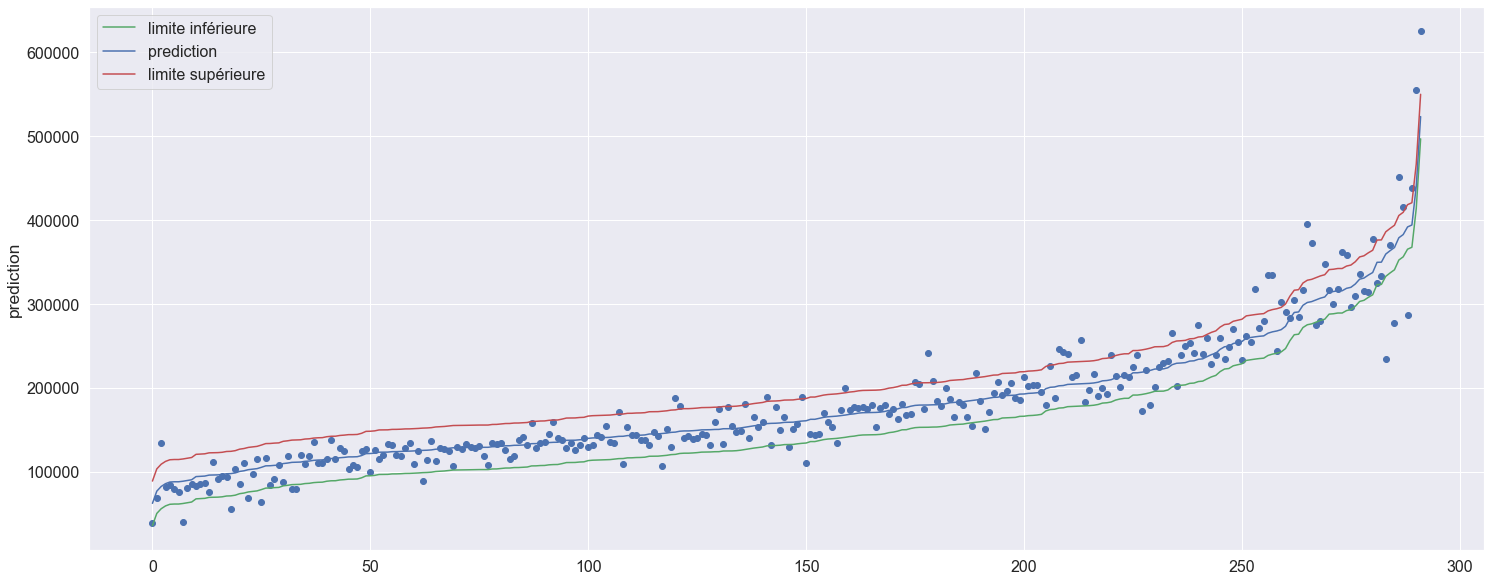

In [91]:
pboundaries(naive, rf, 0.025) 

naive xgboost

Proportion des observations couverts 16.44%


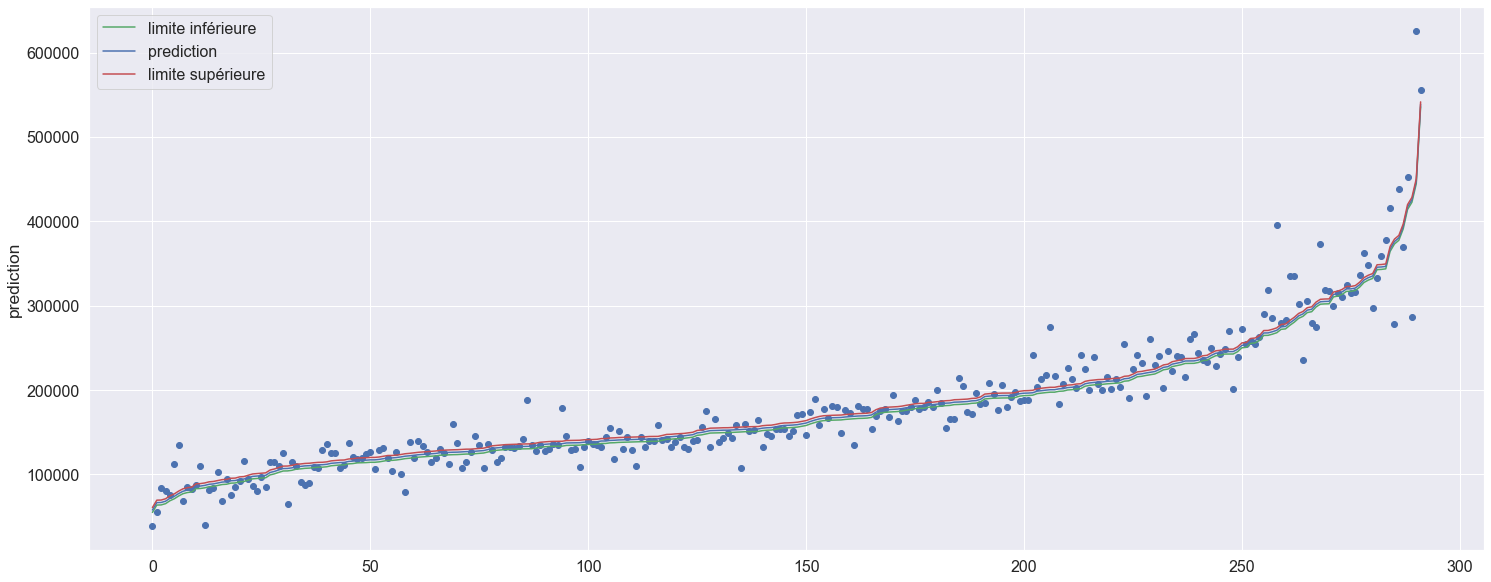

In [153]:
pboundaries(naive, xgb, 0.025)

jacknife random forest

100%|██████████████████████████████████████████████████████████████████████████████| 1165/1165 [16:30<00:00,  1.18it/s]


Proportion des observations couverts 96.92%


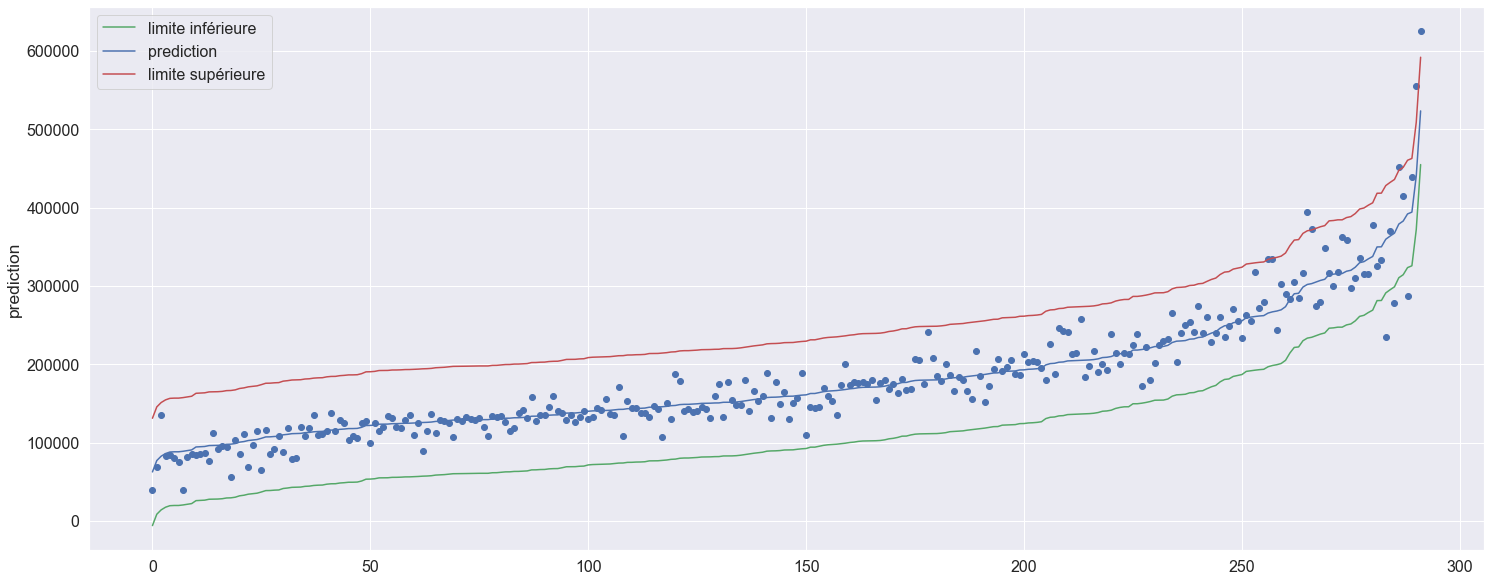

In [150]:
pboundaries(jacknife, rf, 0.025) 

jacknife xgboost 

100%|██████████████████████████████████████████████████████████████████████████████| 1165/1165 [10:08<00:00,  1.91it/s]


Proportion des observations couverts 98.29%


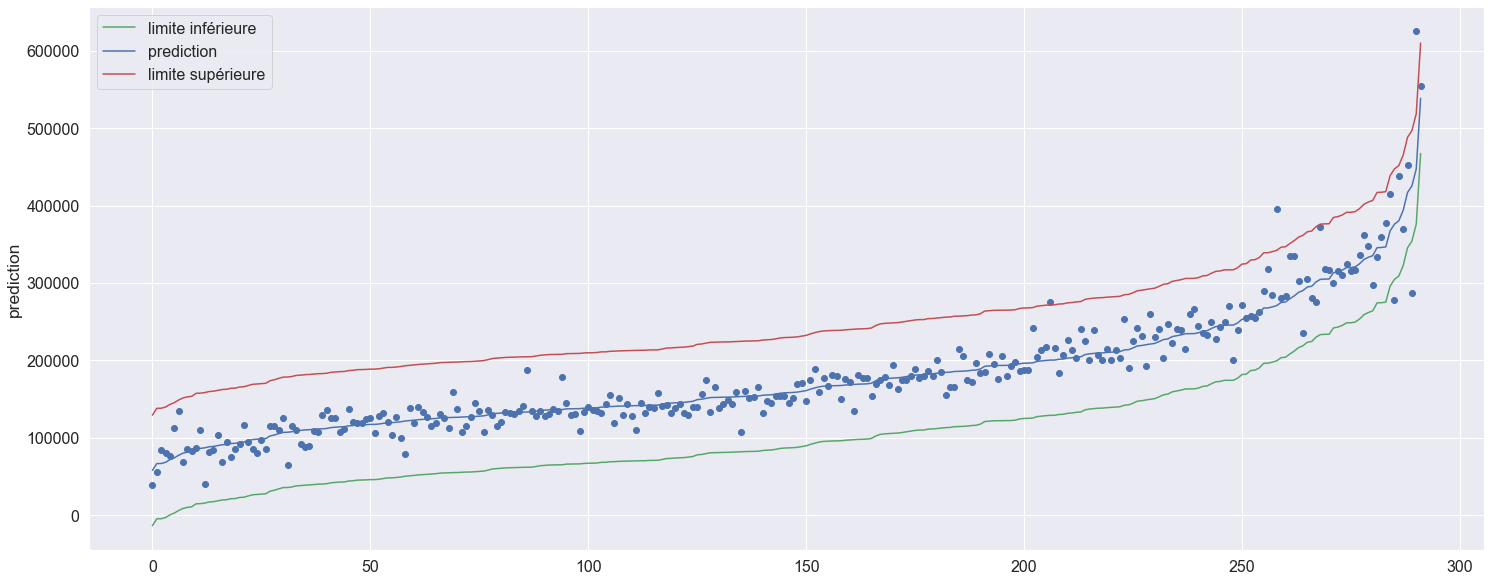

In [156]:
pboundaries(jacknife, xgb, 0.025) 

jacknife plus random forest 

100%|██████████████████████████████████████████████████████████████████████████████| 1165/1165 [17:57<00:00,  1.08it/s]


Proportion des observations couverts 98.29%


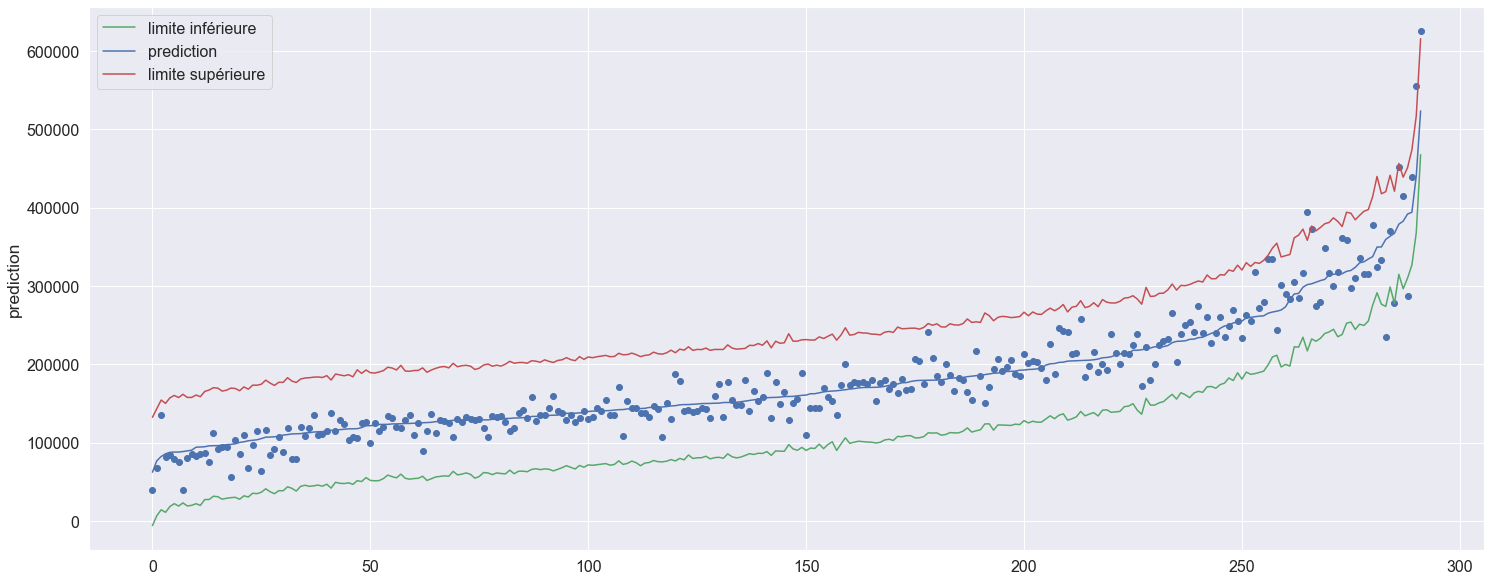

In [170]:
pboundaries(jacknife_plus, rf, 0.025) 

100%|██████████████████████████████████████████████████████████████████████████████| 1165/1165 [10:07<00:00,  1.92it/s]


Proportion des observations couverts 98.97%


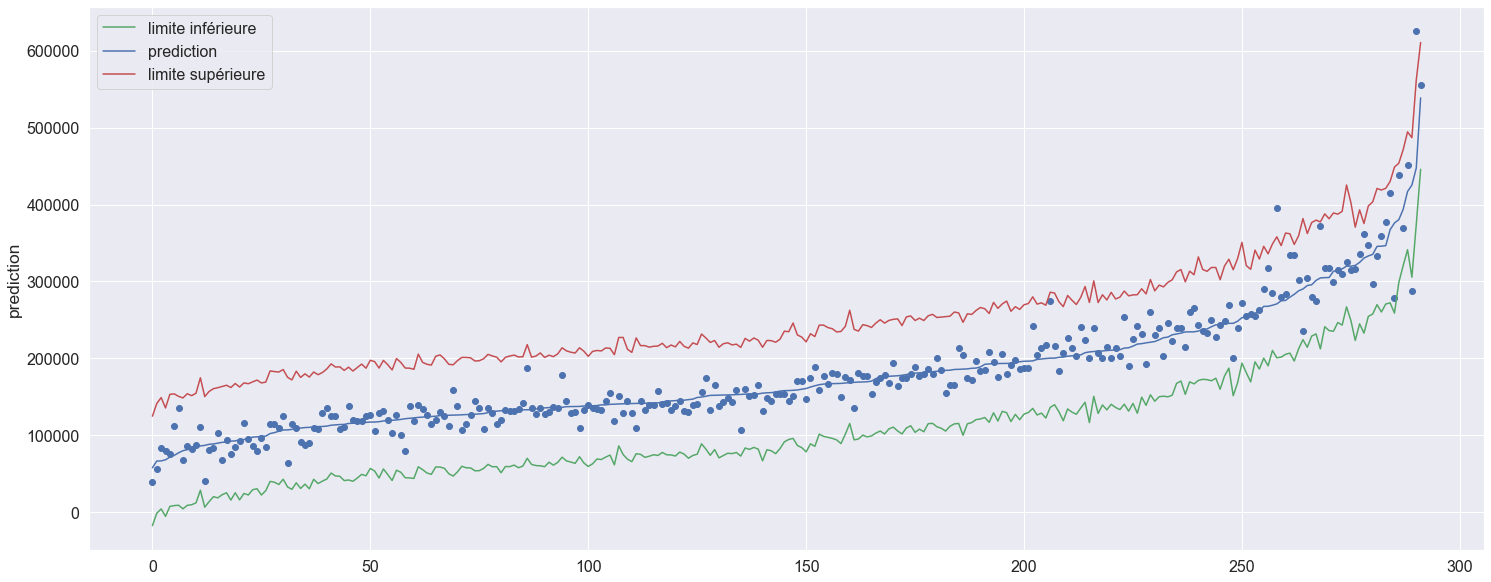

In [171]:
pboundaries(jacknife_plus, xgb, 0.025) 

Avec l'approche naïve on obtient un résultat moins satisfaisant avec une proportion d'observations couvertes très inférieure à 1-$\alpha$= 97.5% dans le cas du modèle xgboost, avec le modèle jacknife, la proportion devient plus élevée dans le cas de xgboost mais pas dans le cas de la forêt aléatoire, et l'intervalle de confiance est plus large par rapport à l'approche naïve, le Jacknife+ donne des résultats satisfaisants avec une proportion de 98% pour les deux modèles supérieure à 97.5%, donc la méthode du Jacknife+ permet d'obtenir les intervalles de confiance recherchés.

# 2. Interpretability  <a name="part2"></a>

##  Data and baseline model    <a name="part2.a"></a>

Les données sources sont issues de la plateforme Kaggle : https://www.kaggle.com/emmaren/cold-calls-data-mining-and-model-selection/data. 

Les données décrivent une base de clients d'un banque, à qui a été présenté par téléphone un produit d'assurance automobile (cross-sell). L'objectif est de prédire la cible, qui vaut 1 si le client a contractualisé le nouveau produit ou 0 sinon.

Les données sont présentes dans le dossier ```data/``` à la racine. Il s'agit du fichier ```carInsurance_train.csv```.

Deux fonctions (*load_car_data* et *prepare_car_data*) ont été préparées afin de faciliter la préparation des données, dans le but de construire un modèle prédictif de l'appétence produit. Elles ont été placées dans le dossier ```useful_functions/``` et peuvent être chargées par l'instruction suivante :

In [3]:
# import usefull libraries 
import pandas as pd
from utils import load_car_data, prepare_car_data

In [4]:
dataset = load_car_data() ## Load raw data
task = prepare_car_data(dataset) ## Prepare, clean, translate and split data between training and testing set

X_train = task.X_train
X_test = task.X_test

y_train = task.y_train
y_test = task.y_test

In [5]:
X_train.head()

AGE         JOB      MARITAL  EDUCATION  DEFAUT  SOLDE  \
1464   52     manager      divorcé        3.0       0   2104   
2548   59  technicien        marié        2.0       0   2528   
765    31  technicien  célibataire        3.0       0    882   
2208   25     ouvrier  célibataire        1.0       0   2483   
2534   35     ouvrier        marié        2.0       0      0   

      ASSUR_HABITATION  PRET_AUTO CANAL_COM  NB_CONTACT  DUREE_DEPUIS_CONTACT  \
1464                 0          0    mobile           2                    -1   
2548                 0          1   inconnu           1                    -1   
765                  0          0    mobile           1                    -1   
2208                 0          0    mobile           3                    -1   
2534                 1          1    mobile           3                    -1   

      NB_ANCIEN_CONTACT RESULTAT_PRECEDENT  DUREE_CONTACT  
1464                  0            inconnu            3.5  
2548                  0            inconnu            3.6  
765                   0            inconnu            6.8  
2208                  0            inconnu           25.0  
2534                  0            inconnu            2.0

### Fast preprocessing  

L'analyse exploratoire est menée sur les variables explicatives, avec la librairie *pandas-profiling*, qui a l'avantage d'être facile automatisée.

Les 14 variables sont les suivantes : 
- Informations **générales** sur les clients
    - AGE: Age du client (en années)
    - EDUCATION: 1 pour éducation primaire, 2 pour secondaire, 3 pour supérieure
    - JOB: Catégorie de métier du client (manager, ouvrier, administratif, technicien, autoentrepreneur, retraité, au_foyer, sans_emploi, étudiant)
    - MARITAL: Statut marital du client (marié, célibataire, divorcé)
- Informations sur le **comportement client**
    - ASSUR_HABITATION: 1 si le client possède un contrat d'assurance habitation, 0 sinon
    - DEFAUT: 1 si le client est en défaut sur un de ses crédits, 0 sinon
    - PRET_AUTO: 1 si le client a un prêt auto, 0 sinon
    - SOLDE: solde moyen annuel ($)
- Informations sur les **campagnes précédentes**
    - DUREE_DEPUIS_CONTACT: nombre de jours écoulés depuis le dernier appel téléphonique de la campagne précédente (en jours), -1 si le client n'a jamais été contacté auparavant
    - NB_ANCIEN_CONTACT: nombre de contacts par téléphone, réalisés lors de la campagne précédente
    - RESULTAT_PRECEDENT: résultat de la précédente campagne (inconnu, échec, succès)
- Informations sur la **campagne en cours**
    - CANAL_COM: canal de communication utilisé lors de la campagne en cours (mobile, fixe, inconnu)
    - DUREE_CONTACT: durée de l'appel téléphonique lors du dernier contact par téléphone (en minutes)
    - NB_CONTACT: nombre de contacts par téléphone, réalisés lors de la compagne en cours

### <span style="color:red">A vous de jouer !</span> 
Utilisez pandas_profiling pour explorer le jeu de données X_train

Lien vers le github: https://github.com/pandas-profiling/pandas-profiling

In [6]:
# import pandas profiling and create profile 
from pandas_profiling import ProfileReport
profile = ProfileReport(X_train, title="Profiling X train")

In [7]:
# create widgets 
profile.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

La cible à prédire décrit le comportement du client: 1 si contractualisation du produit d'assurance auto, 0 sinon. L'échantillon d'entraînement comprend 765 contractualisations pour 1145 refus.

### <span style="color:red">A vous de jouer !</span> 

Retrouvez la composition de la cible y_train (765 contractualisations pour 1145 refus)

In [8]:
# disable some widgets 
profile = pd.Series(y_train).to_frame()  .profile_report(show_variable_description=False, 
                                         samples=None, 
                                         correlations=None, 
                                         interactions=None,
                                         missing_diagrams=None, 
                                         dark_mode=True)
# create widgets 
profile.to_widgets()

Summarize dataset:   0%|          | 0/9 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

dans l'onglet duplicate rows, on trouve le résultat recherché. 

### <span style="color:red">A vous de jouer !</span> 

Combien y a-il de valeurs manquantes dans notre jeu d'entraînement X_train?

In [9]:
# investingate missing values 
profile = X_train.profile_report(show_variable_description=False, 
                                 samples=None, 
                                 correlations=None, 
                                 duplicates=None, 
                                 interactions=None,
                                 missing_diagrams=None, 
                                 dark_mode=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

nombre de cellules avec des valeurs manquantes est 0

Dummification des variables catégorielles :

In [10]:
# changer les séparateurs entre variables 
def change_separator(df, categorical_variables, sep_in='_', sep_out='__'):
    column_names_serie = pd.Series(df.columns.tolist())

    for var in categorical_variables:
        column_names_serie = column_names_serie.str.replace(var+sep_in, var+sep_out)
    
    df.columns = column_names_serie.tolist()
    return df

In [11]:
from category_encoders import OneHotEncoder
categorical_variables = ['JOB', 'MARITAL', 'CANAL_COM', 'RESULTAT_PRECEDENT']

onehot = OneHotEncoder(
    cols=categorical_variables,
    handle_unknown='ignore',
    use_cat_names=True
).fit(X_train)


X_train_dummified = change_separator(
    onehot.transform(X_train),
    onehot.cols
)

X_test_dummified = change_separator(
    onehot.transform(X_test),
    onehot.cols
)

c:\users\issam\appdata\local\programs\python\python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



### <span style="color:red">A vous de jouer !</span> 

Familiarisez-vous maintenant avec les nouvelles variables qui composent notre jeu d'entraînement X_train_dummified

In [12]:
# use pandas profiling to investigate data  
profile =  X_train_dummified.profile_report()
profile.to_widgets()

Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Training model (Random Forest)  <a name="part1.d"></a>

In [13]:
# training the model 
from sklearn.ensemble import RandomForestClassifier
# adding n_jobs =-1 to use all processors
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1) 

### <span style="color:red">A vous de jouer !</span> 

Entraînez le modèle sur les données précédemment préparées

In [14]:
# fit on data 
model.fit(X_train_dummified, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###  Performance <a name="part1.e"></a>

### <span style="color:red">A vous de jouer !</span> 

Calculez les prédictions (en probabilité) de l'échantillon de test et stockez-les dans la variable y_score

In [15]:
# compute probabilities 
y_score = model.predict_proba(X_test_dummified)[:, 1]

In [16]:
# import usefull libraries 
%matplotlib inline 
import matplotlib.pyplot as plt
from inspect import signature

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

### <span style="color:red">A vous de jouer !</span> 
Tracez la courbe précision-rappel du modèle sur l'échantillon de test

Aide : http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

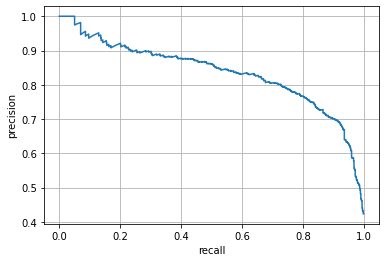

In [17]:
# plot roc precision curve 
plt.plot(*reversed(precision_recall_curve(y_test, y_score)[:2]))
plt.xlabel("recall") 
plt.ylabel("precision") 
plt.grid()

### Sauvegarde du modèle et des données  <a name="part1.f"></a>

Dans le dictionnaire suivant sont stockés les informations nécessaires la suite de l'exercice (données + modèle)

In [18]:

data_model_dict = {
    'X_train': X_train_dummified,
    'X_test': X_test_dummified, 
    'y_train': y_train,
    'y_test': y_test,
    'model': model
}

Export du dictionnaire sous la forme d'un pickle

In [19]:
import pickle

In [20]:
with open('data_model_rf.pickle', 'wb') as handle:
    pickle.dump(data_model_dict, handle)

## Interpretability through visualisation <a name="part2.b"></a>

### Partial Dependance Plots (PDP curves) 

In [22]:
# import usefull libraries 
from pdpbox import pdp
import matplotlib.pyplot as plt

### <span style="color:red">A vous de jouer !</span> 

Modifiez le nom de la variable ci-dessous afin d'analyser **les variables** les plus importantes.

<!-- __NB__ : Les trois variables les plus importantes (au sens de Permutation Importance et MDI) sont :
`DUREE_CONTACT`, `SOLDE` et `AGE` -->

In [101]:
# import usefull libraries 
len(model.feature_importances_)

29

In [23]:
# most important variables 
importance = pd.DataFrame(zip(X_train_dummified.columns, model.feature_importances_), columns=["variable", "importance"])
importance = importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
importance = importance.style.format({'importance': "{:.2%}"})
importance

In [24]:
# features 
print(*X_test.columns, sep="\t") 

AGE	JOB	MARITAL	EDUCATION	DEFAUT	SOLDE	ASSUR_HABITATION	PRET_AUTO	CANAL_COM	NB_CONTACT	DUREE_DEPUIS_CONTACT	NB_ANCIEN_CONTACT	RESULTAT_PRECEDENT	DUREE_CONTACT


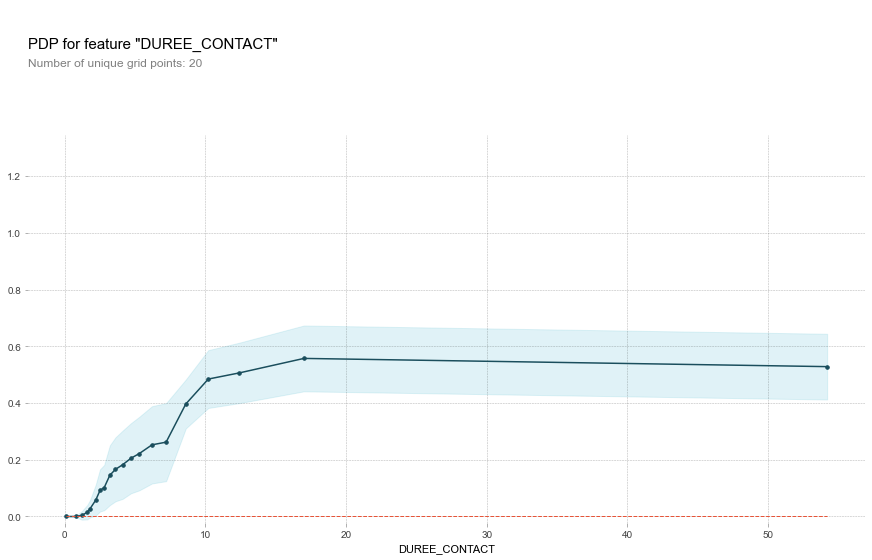

In [34]:
# investigate variables 
variable = 'DUREE_CONTACT' 

pdp_goals = pdp.pdp_isolate(model=model,
                            dataset=X_test_dummified,
                            model_features=X_test_dummified.columns,
                            feature=variable,
                            num_grid_points=20,
                            grid_type='percentile', #possible values: 'equal' or 'percentile'
)

pdp.pdp_plot(pdp_goals, variable, center=True) # center arg center plots and compare each value to the first one
plt.show()

### <span style="color:red">A vous de jouer !</span> 

Suite à cette exploration, que peut-on conclure ?

Quel comportement semble se dégager entre entrées et sorties ?

La durée du contrat semble affecter largement le comportement du modèle, plus la durée du contact d'un précédent appel est longue, plus l'utilisateur est susceptible de signer un contrat, car cela montre qu'il est intéressé et bien informé de l'offre. 

Le solde joue également sur la susceptibilité du client à signer un contrat, il est clair que plus le client a un solde annuel important plus il est capable de s'engager et d'accepter le démarchage téléphonique, il est également probable qu'il possède une voiture. 

L'âge montre qu'une certaine tranche de la population entre 30 et 55 ans est moins intéressée par l'assurance auto car il est probable que ces clients ont déjà une assurance auto et ne cherchent pas à changer de contrat, en dehors de cette tranche d'âge, notamment pour les clients de plus de 65 ans, les clients sont beaucoup plus susceptibles d'être intéressés par ce type de contrat. 

Si une compagne a eu du succès lors de contacts précédents, les clients contactés sont plus susceptibles d'accepter l'offre. 

Plus le délai entre les contacts est long, plus le client est susceptible de ne pas signer le contrat d'assurance auto. 

Le PEP permet de tirer des informations importantes, notamment sur la relation entre l'entrée et la sortie, il est possible d'utiliser ce type de graphique pour tirer des informations sur les variables influençant la sortie d'un modèle. 

###  Individual Conditional Expectation Curves (ICE curves) 

In [29]:
# import usefull libraries 
from matplotlib.cm import PuOr
from pycebox.ice import ice, ice_plot

**WARNING**: cette librairie n'est pas très bien documentée : http://austinrochford.github.io/PyCEbox/docs/

On prend un sous-échantillon de 100 personnes. Au-delà, la visualisation ne donnera rien.

In [30]:
X_ref = X_test_dummified.copy().sample(100, random_state=42)

In [31]:
f_predict = model.predict

### <span style="color:red">A vous de jouer !</span> 

Modifiez le nom de la variable ci-dessous afin d'analyser les variables les plus importantes

<!-- __NB__ : Les trois variables les plus importantes (au sens de Permutation Importance et MDI) sont :
`DUREE_CONTACT`, `SOLDE` et `AGE` -->

Text(0.5, 1.0, 'ICE Curves')

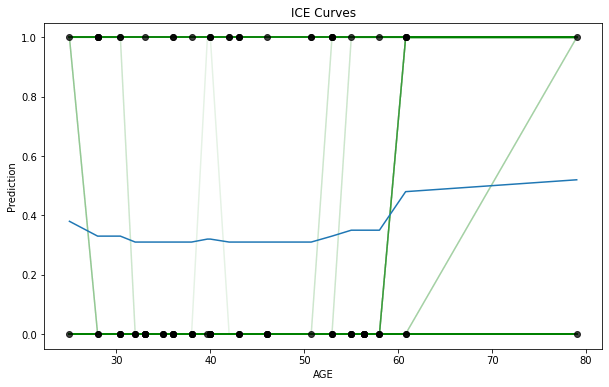

In [36]:
# analyse variable by variable
variable = 'AGE' 
 
ice_df = ice(X_ref, variable, f_predict, num_grid_points=20)

fig, ax_ice = plt.subplots(nrows=1, ncols=1,figsize=(10, 6))

ice_plot(ice_df, plot_points=True, point_kwargs={'color': 'k', 'alpha': 0.75}, c='g',
         alpha=0.1, plot_pdp=True, ax=ax_ice)

ax_ice.set_xlabel(variable)
ax_ice.set_ylabel('Prediction') 
ax_ice.set_title('ICE Curves')

### <span style="color:red">A vous de jouer !</span> 

Quelles conclusions tirer de ces résultats ?

Nous obtenons les mêmes conclusions que précédemment, le PDP est une moyenne de l'ICE, l'ICE peut être calculé même pour une seule observation. Le seuil est un peu différent car l'échantillon de population est plus petit, mais représentatif car il est tiré aléatoirement.

## From visualiazation to Global Importance <a name="part2.c"></a>

####  Import model and data <a name="part2.a"></a>

In [39]:
import pickle

with open('data_model_rf.pickle', 'rb') as handle:
    data_model_dict = pickle.load(handle)

X_train, X_test, y_train, y_test, model = data_model_dict.values()
f_predict = lambda x: model.predict_proba(x)[:, 1]

Exemple : Une prédiction pour 10 échantillons aléatoires du jeu de test:

In [330]:
# 10 prediction for test data 
f_predict(X_test_dummified.sample(10, random_state=42))

array([0.3031281 , 0.72863916, 0.28441552, 0.46772405, 0.08830898,
       0.79297156, 0.77461452, 0.29012616, 0.71590807, 0.75981669])

In [37]:
import numpy as np
import seaborn as sns

from utils import plot_features_importance

### <span style="color:red">A vous de jouer !</span> 

En utilisant la fonction plot_features_importance précédemment définie, affichez les 10 variables les plus importantes du random forest.

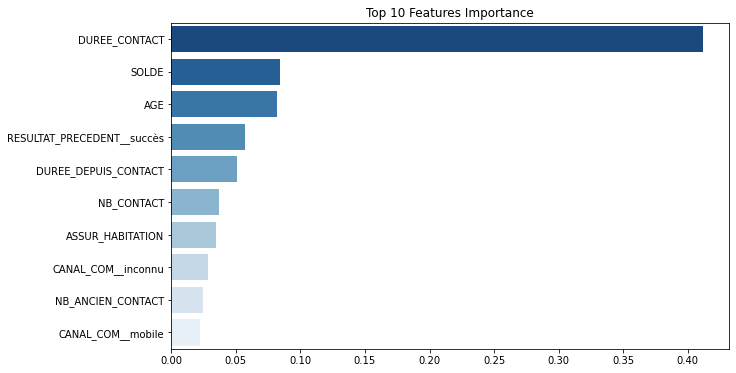

In [40]:
# plot feature importance
plot_features_importance(X_test, model.feature_importances_, 10)

### Mean Decrease Impurity

### <span style="color:red">A vous de jouer !

Vérifiez l'implémentation de Scikit-learn de la feature importance (MDI) en implémentant vous même votre propre fonction de calcul d'impurity importances des features.

Pour rappel, la définition formelle de la MDI importance est la suivante :

Soient :
- $M$ le nombre d’estimateurs
- $\Phi_m$ l’ensemble des nœuds de l’estimateur $m$
- $j_t$ étant la variable utilisé pour le split $s_t$ du nœud $t$
- $p(t) = \frac{N_t}{N}$ la proportion d'observations atteignant le noeud $t$
- $\Delta i(s_t, t)$, la diminution de l’impureté des nœuds (𝑖 étant la mesure d’impureté).

Alors la MDI se définit par :

$$\phi^{\text{MDI}}(X_j) = \frac{1}{M}\sum_{m=1}^{M}\sum_{t\in \Phi_m} \mathbb{1}(j_t = j)[p(t)\Delta i(s_t, t)]$$

et la MDI importance (MDI normalisée) par :

$$\tilde{\phi}^{\text{MDI}}(X_j) = \frac{\text{MDI}(X_j)}{\sum_{i} \text{MDI}(X_i)}$$

Indices niveau 1:
- <p style="background-color: black">Pour accéder à chaque arbre d'une forêt, passez par l'attribut `estimators_`</p>
- <p style="background-color: black">Pour accéder aux attributs pertinents d'un arbre, passez par l'attribut `tree_` de l'arbre</p>

Indices niveau 2:
- <p style="background-color: black">Les attributs pertinents de l'arbre sont `children_left`, `children_right`, `feature`, `impurity` et `weighted_n_node_samples`</p>
- <p style="background-color: black">Ces derniers sont les attributs de chaque noeud, ainsi le premier élément de chacun des attributs pertinents et l'attribut associé du premier noeud, la racine</p>

Indices niveau 3:
- <p style="backgrounmd-color: black">Une manière à faire consiste en la définition d'une (voire deux) classe(s) associé à un noeud (par exemple créer une classe Node et Leaf)</p>
- <p style="background-color: black">Ensuite, créer les noeuds associés à l'arbre avec chacun de leurs attributs.</p>
- <p style="background-color: black">Enfin, itérez sur les noeuds et calculer la diminution d'impureté à ce noeud et ajoutez la à la feature associée</p>
- <p style="background-color: black">Ne pas oublier de normaliser lorsque nécessaire</p>

Signature d'une solution (les lignes vides ont été retirées pour avoir le fond noir, n'hésitez pas à remettre en PEP8):
<div style="background-color: black">
class Node:
    '''Node of a decision tree'''
    def __init__(self, index, left, right, feature, impurity, node_samples):
        '''
        Parameters
        ----------
        index : int
            index of current node in the enumeration
        left : int
            index of the current node's left child
        right : int
            index of the current node's right child
        feature : int
            index of the feature used in current node
        impurity : float
            impurity of the current node
        node_samples : float
            number of training observations in current node (potentially weighted thus the float type)
        '''
        self.index = index
        self.left = left
        self.right = right
        self.feature = feature
        self.impurity = impurity
        self.node_samples = node_samples
    @property
    def weighted_impurity(self):
        '''Weighted imputiy by number of training observations in current node'''
        return None
class Leaf(Node):
    '''Leaf node of a decision tree (no child)'''
    def __init__(self, index, impurity, node_samples):
        '''
        Parameters
        ----------
        index : int
            index of current node in the enumeration
        impurity : float
            impurity of the current node
        node_samples : float
            number of training observations in current node (potentially weighted thus the float type)
        '''
        self.index = index
        self.impurity = impurity
        self.node_samples = node_samples
def get_nodes_from(tree, weighted=True):
    '''Get nodes from decision tree
    Parameters
    ----------
    tree : sklearn.tree.tree.DecisionTreeClassifier
        tree from which nodes will be instantiated
    weighted : bool
        should number of training observations in each node should be weighted
        (weighted_n_node_samples attribute from decision tree)
    Returns
    -------
    nodes : list of Node/Leaf
        each node/leaf of the decision tree ordered by their index
    '''
    nodes = None
    return nodes
def _normalize(array, axis=None):
    '''Normalize a positive array (creates a copy of the array) along a given axis when feasible
    Parameters
    ----------
    array : np.ndarray
        positive array to normalize (ie. array / array.sum(axis=axis))
    axis : int or None
        axis to normalize onto
    Returns
    -------
    np.ndarray
        normalized array if normalizer is greater than 0 otherwise itself
    '''
    return None
def compute_impurity_importance_from(node, left, right):
    '''Compute impurity importance from a node to its left and right children
    Parameters
    ----------
    node : Node
        current node on which impourity importance will be computed
    left : Node
        left child of node, could be a Leaf
    right : Node
        right child of node, could be a Leaf
    Returns
    -------
    float
        impurity importance betwee node and its children
    '''
    return None
def compute_tree_impurity_importances(tree, normalize=True, weighted=True):
    '''Compute impurity importances (MDI when normalized) from a fitted tree (Scikit-learn API)
    Parameters
    ----------
    tree : sklearn.tree.tree.DecisionTreeClassifier or sklearn.tree.tree.DecisionTreeRegressor
        fitted tree on which impurity importances will be computed
    normalize : bool
        indicates if importances should be normalized to sum up to 1 (MDI)
    Returns
    -------
    importances : np.ndarray
        impurity importances (MDI when normalized) of fitted decision tree classifier
    '''
    importances = None
    return importances
def compute_forest_impurity_importances(forest, normalize=True, weighted=True):
    '''Compute impurity importances (MDI when normalized) from a fitted forest (Scikit-learn API)
    Parameters
    ----------
    forest : sklearn.ensemble.forest.RandomForestClassifier or sklearn.ensemble.forest.RandomForestRegressor
        fitted forest on which impurity importances will be computed
    normalize : bool
        indicates if importances should be normalized to sum up to 1 (MDI)
    Returns
    -------
    importances : np.ndarray
        impurity importances (MDI when normalized) of fitted forest
    '''
    importances = None
    return importances
</div>

In [311]:
# coding feature importance 
import numpy as np 
from collections import namedtuple

# create mini class 
Node = namedtuple("Node", ["index", 'impurity', 'feature', "left", 'right', "nb_samples"])

# return all nodes of a tree with description 
def compute_tree_nodes(tree):
    children_left = tree.children_left
    children_right = tree.children_right
    impurity = tree.impurity
    features = tree.feature 
    nb_samples = tree.weighted_n_node_samples 
    nodes = list() 
    for index in range(len(children_left)):
        left = None
        right = None
        feature = None 
        # if not a leaf, fill class 
        if children_left[index] != children_right[index]: 
            left = children_left[index]
            right = children_right[index]
            feature = features[index]

        node = Node(index = index,  
                          impurity = impurity[index], 
                          feature = feature,  
                          left = left, 
                          right = right, 
                          nb_samples = nb_samples[index]

                         )
        nodes.append(node)  
    return nodes 
    
# compute tree importance 
def compute_tree_impurity_importances(tree, normalize=True, weighted=True):
    '''Compute impurity importances (MDI when normalized) from a fitted tree (Scikit-learn API)

    Parameters
    ----------
    tree : sklearn.tree.tree.DecisionTreeClassifier or sklearn.tree.tree.DecisionTreeRegressor
        fitted tree on which impurity importances will be computed
    normalize : bool
        indicates if importances should be normalized to sum up to 1 (MDI)
    weighted : bool
        should number of training observations in each node be weighted
        (weighted_n_node_samples attribute from decision tree)

    Returns
    -------
    importances : np.ndarray
        impurity importances (MDI when normalized) of fitted decision tree classifier

    '''
    # create nodes 
    nodes = compute_tree_nodes(tree.tree_)
    
    # create list to fill in importance 
    ϕMDI = np.zeros(tree.tree_.n_features, dtype=np.float64)
    
    # compute of each iteration based on the mathematical formula 
    N = nodes[0].nb_samples
    for node in nodes:
        # if not a leaf 
        if node.feature is not None: 
 
            left = nodes[node.left]
            right =  nodes[node.right]
            # weight using probabilities else not weighted 
            p = (node.nb_samples/N) if weighted else 1 
            Δi = node.impurity  - (left.impurity*left.nb_samples + right.impurity*right.nb_samples)/node.nb_samples 

            ϕMDI[node.feature] += p*Δi
    # normalizing feature importance if the option is selected 
    if normalize:
        
        return ϕMDI/ϕMDI.sum()
            
    return ϕMDI

# compute feature importance for the random forest 
def compute_forest_impurity_importances(forest, normalize=True, weighted=True):
    '''Compute impurity importances (MDI when normalized) from a fitted forest (Scikit-learn API)

    Parameters
    ----------
    forest : sklearn.ensemble.forest.RandomForestClassifier or sklearn.ensemble.forest.RandomForestRegressor
        fitted forest on which impurity importances will be computed
    normalize : bool
        indicates if importances should be normalized to sum up to 1 (MDI)
    weighted : bool
        should number of training observations in each node be weighted
        (weighted_n_node_samples attribute from decision tree)

    Returns
    -------
    importances : np.ndarray
        impurity importances (MDI when normalized) of fitted forest

    '''
    # compute mean of importance of each tree 
    importances = np.mean([compute_tree_impurity_importances(tree, normalize, weighted) for tree in forest.estimators_], axis=0)
    if normalize: 
        importances = importances/importances.sum()
    return importances

In [312]:
# see if the function works for each tree 
for tree in model.estimators_:

    try:
        np.testing.assert_almost_equal(compute_tree_impurity_importances(tree),
                                       tree.tree_.compute_feature_importances())
    except Exception as e:
        print('compute_tree_impurity_importances is problematic!')
        raise e

print('Well done, your function are well defined!')

Well done, your function are well defined!


In [313]:
# see if the functions works for forestes 
try:
    np.testing.assert_almost_equal(compute_forest_impurity_importances(model),
                                   model.feature_importances_)
except:
    print('compute_tree_impurity_importances is problematic!')
    raise e

print('Well done, your functions are well defined!')

Well done, your functions are well defined!


In [334]:
f_predict(X_test.sample(10, random_state=42))

array([0.3031281 , 0.72863916, 0.28441552, 0.46772405, 0.08830898,
       0.79297156, 0.77461452, 0.29012616, 0.71590807, 0.75981669])

###  Permutation importances <a name="part2.b"></a>

In [340]:
# import permutation importance 
import eli5
from eli5.sklearn.permutation_importance import PermutationImportance
PermImp = PermutationImportance(model, n_iter=20, random_state=42, cv='prefit', refit=False)

### <span style="color:red">A vous de jouer !</span> 
Maintenant que l'objet PermImp est configuré, à vous de jouer pour calculer les importances, sur le jeu de données d'entraînement.

Plus d'informations ici : https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

In [321]:
from utils import plot_features_importance

In [ ]:
# compute importance on training data 
perm = PermImp.fit(X_train, y_train)

In [346]:
feature_importances = perm.feature_importances_

In [347]:
# show importances 
eli5.show_weights(perm)

### <span style="color:red">A vous de jouer !</span> 

En utilisant ou pas la fonction plot_features_importance précédemment définie, affichez les 10 variables les plus importantes du modèle (au sens de la Permutation Importance).

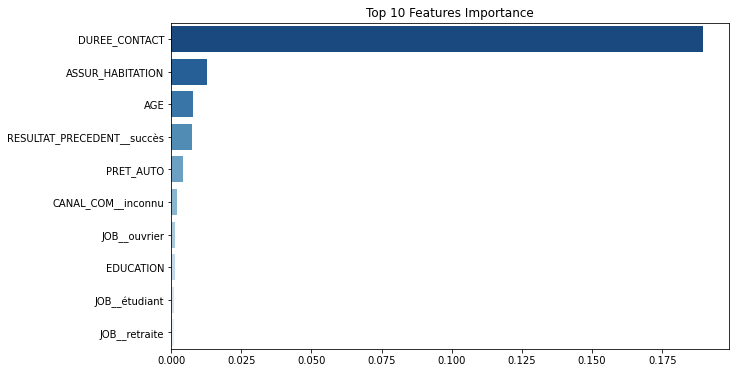

In [349]:
# plot featue importance to see in terme of permutation importance 
plot_features_importance(X_train, feature_importances, 10)

### <span style="color:red">A vous de jouer !</span> 

En comparant les 2 méthodes de feature importances, que peut-on conclure ?

### <span style="color:red">A vous de jouer ! Exercice intermédiaire, n'hésitez pas à poser des questions</span>

Vérifiez l'implémentation d'eli5 de la feature importance (MDA) en implémentant vous même votre propre fonction de calcul de permutation importances des features.

<font color="red">erreur au niveau de l'expression ci-dessous $L_l - L_\pi$  est pas le contraire </font>

Pour rappel la définition formelle de la MDA est la suivante :

Soient :
- $\mathcal{L}$ les données de test de taille $N$
- $\pi_j(\mathcal{L})$ une réplication de $\mathcal{L}$ avec permutation aléatoire des valeurs de la variable $X_j$
- $\Phi_l$ l’estimateur d’indice $l$ parmi les $M$ estimateurs
- $L$ la fonction de perte

La perte sur les données de test d'origine sont définies de la manière suivante :
$$L_{\mathcal{L}} = \frac{1}{N}\sum_{(x_i, y_i) \in \mathcal{L}}L\left(\frac{1}{M}\sum_{l=1}^{M}\Phi_l(x_i), y_i\right)$$

La perte moyenne après une permutation :
$$L_{\pi} = \mathbb{E}_{\pi_j}\left[\frac{1}{N}\sum_{(x_i^{'}, y_i) \in \pi_j(\mathcal{L})}L\left(\frac{1}{M}\sum_{l=1}^{M}\Phi_l(x_i^{'}), y_i\right)\right]$$



Et finalement :
$$\phi^{\text{MDA}}(X_j) = L_{\pi} - L_{\mathcal{L}}$$

Puis en normalisant :
$$ \tilde{\phi}^{\text{MDA}}(X_j) = \frac{\text{MDA}(X_j)}{L_{\mathcal{L}}} = \frac{L_{\pi}}{L_{\mathcal{L}}} - 1$$

<span style="color:red">N'oubliez pas qu'eli5 ne fait pas la dernière étape de normalisation !</span>

Conseils :
- N'hésitez pas à vous servir de tqdm qui permet d'avoir un état de l'avancement d'une boucle `from tqdm import tqdm_notebook as tqdm`, avec `tqdm(range(10))` un exemple de son utilisation . Une autre méthode peut être utilisée pour suivre l'avancement d'une boucle
- Le score utilisé pour l'importance est celui implémenté de base dans le model (la méthode `score`)
- Les résultats peuvent être proches mais différents (comme les résultats sont stochastiques). Une implémentation directe de la fonction ainsi qu'utiliser la même seed devrait cependant donner les même résultats. En cas de doute, n'hésitez pas à attendre le formateur pour qu'il vérifie que vos résultats sont justes.

Indices 1 :
- <p style="background-color: black">Pour mélanger vos données, sans que cela se fasse _inplace_, utilisez `np.random.permutation`</p>

Indices 2 :
- <p style="background-color: black">N'hésitez pas à passer par les array numpy, ils sont probablement plus simple à manipuler ici</p>
- <p style="background-color: black">Vous pouvez vous servir de la méthode `copy` pour créer des copies de vos données que vous allez altérer</p>

In [802]:
from tqdm import tqdm_notebook as tqdm
from sklearn.utils import check_random_state

# shuffle each column 
def shuffle(x, seed):
    
    x_shuffle = x.copy() 
    
    for index in range(x.shape[1]):

        seed.shuffle(x_shuffle[:, index])
        
        yield x_shuffle
        
        x_shuffle[:, index] = x[:, index] 
    
    
def compute_permutation_importances(model, x, y, n_iter=20, normalize=False, random_state=42):
    '''Compute permutation importances using score method

    Parameters
    ----------
    model : instance of BaseEstimator
         scikit-learn estimator with score method
    x : np.ndarray or pd.DataFrame
        input features for computing permutation importance
    y : np.ndarray or pd.DataFrame
        target for computing permutation importance
    n_iter : int
        number of iterations to approximate expected value of permutated importance
    normalize : bool
        normalize by original score when set to True
    random_state : int or None
        numpy seed used
    '''
    seed = check_random_state(random_state)
    
    Ll = model.score(x, y)
    x_array = x.values
    results = list()
    # compute for each step the score after shuffling a column 
    for _ in tqdm(range(n_iter)):
        result = np.array([model.score(X, y) for X in shuffle(x_array, seed)])
        results.append(result)
    
    # compute Lπ buy a mean on all scores 
    Lπ = np.mean(results, axis=0)
    # compute importances 
    importances =  Ll - Lπ
    # normalize if the option is selected 
    if normalize:
        importances = importances/Ll
    return importances

In [804]:
# test if the code functions 
try:
    permutation_importances = compute_permutation_importances(model, X_test, y_test, n_iter=20, random_state=42)
except Exception as e:
    
    print('Your implementation has a problem!')

try:
    np.testing.assert_almost_equal(permutation_importances, PermImp.feature_importances_)
except Exception as e:
    print('Your permutation importances are different! Check if ' +
          'its due to a seed problem or because of your implementation! The formator can answer you')
print('Well done, your functions are well defined!')

Well done, your functions are well defined!


## From global to local explanations <a name="part2.d"></a>

#### Import data and model <a name="part3.a"></a>

In [805]:
import pickle

with open('data_model_rf.pickle', 'rb') as handle:
    data_model_dict = pickle.load(handle)

X_train, X_test, y_train, y_test, model = data_model_dict.values()
f_predict = lambda x: model.predict_proba(x)[:,1]

Exemple : Une prédiction pour 10 échantillons aléatoires du jeu de test:

In [806]:
f_predict(X_test.sample(10, random_state=42))

array([0.3031281 , 0.72863916, 0.28441552, 0.46772405, 0.08830898,
       0.79297156, 0.77461452, 0.29012616, 0.71590807, 0.75981669])

##  SHappley Additive exPlaination (SHAP) <a name="part3.c"></a>

SHAP (SHapley Additive exPlanations) est une méthode unifiée pour expliquer les sorties d'un modèle de machine learning. En utilisant la théorie des jeux sur des explications locales, plusieurs méthodes (LIME, treeinterpreter) sont unifiées par une méthode de calcul consistante basée sur les valeurs de Shapley.
En effet, le problème de certaines méthodes de calcul de contribution (treeinterpreter) est d'être trop sensible à l'ordre dans lequel les variables "apparaissent". 

In [807]:
import shap
import pandas as pd

In [808]:
shap.initjs()

Application de _TreeSHAP_ sur le modèle et entraîné sur le dataset de test

In [809]:
%%time
explanation = shap.TreeExplainer(model)
shap_values = explanation.shap_values(X_test)[1]
df_contrib = pd.DataFrame(shap_values, columns=X_test.columns, index=X_test.index)
bias = explanation.expected_value[1]

Wall time: 14.1 s


Remarquez que `[1]` est nécessaire en tâche de classification binaire car il appelle les valeurs de Shapley associées à la classe `1`. En cas de régression, cela n'est pas nécessaire, et en classification non binaire, choisissez l'indice de la classe que vous voulez expliquez.

###  Plots par défaut de la librairie 

La documentation est disponible sur le github de la librairie et fournit un bon nombre d'exemple de manipulation de données : https://github.com/slundberg/shap.

### <span style="color:red">A vous de jouer !</span> 
**Explorez une prédiction avec une intelligibilité locale.**

Modifiez l'exemple ci-dessous, de manière à pouvoir interpréter plusieurs prédictions individuelles

In [823]:
# interprete 10 variables 
index = 5 # choose an integer
shap.plots.force(explanation.expected_value[1], shap_values[0:11, :], X_test.iloc[0:11, :])

In [832]:
# a verification 
model.predict_proba(X_test.iloc[0:11, :])[:, 1]

array([0.11037194, 0.36460622, 0.18368148, 0.10697066, 0.16595823,
       0.34331212, 0.07028842, 0.21613353, 0.16069167, 0.69423446,
       0.04438568])

### <span style="color:red">A vous de jouer !</span> 
**Comprendre le modèle avec de l'intelligibilité globale.**

Tentez d'explorer cette visualisation. Attention, elle n'est pas forcément très intuitive/informative.

In [833]:
# explore visualy the results 
shap.force_plot(explanation.expected_value[1], shap_values, X_test)

### <span style="color:red">A vous de jouer !</span> 
Tentez d'explorer cette visualisation. Elle porte beaucoup de sens pour les variables continues.

C'est en effet un graphe qui montre la contribution d'une variable sur tout le dataset. <br>
Une autre variable d'intéraction peut être rajoutée pour voir des effets combinés.

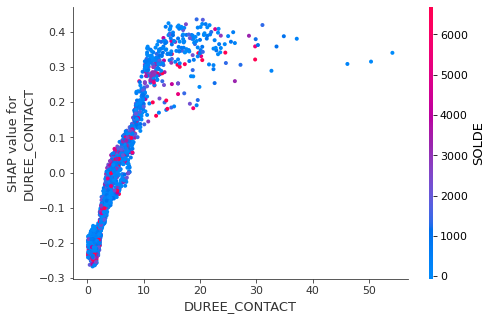

In [834]:
# see the interactions 
variable_1 = "DUREE_CONTACT"
variable_2 = "SOLDE"
interaction_index = X_test.columns.tolist().index(variable_2)

shap.dependence_plot(variable_1, shap_values, X_test, interaction_index=interaction_index)

### <span style="color:red">A vous de jouer !</span> 
Quelles conclusions tirer du graphe suivant ?

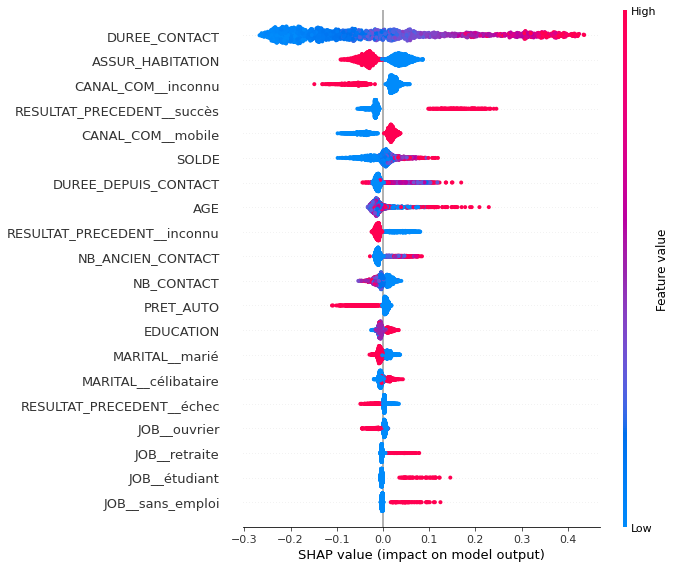

In [835]:
shap.summary_plot(shap_values, X_test, plot_type="dot")

Ce graphique nous permet d'identifier les variables les plus importantes, plus la valeur de la variable DUREE_CONTACT augmente, plus la probabilité que le client contacté signe un contrat d'assurance auto est grande, si le client a une assurance habitation, il a moins de chance de contracter, aussi, cette variable a moins d'impact que DUREE_CONTACT, On remarque également que plus le client est contacté, moins il y a de chance qu'il accepte un contrat. Le succès des contacts précédents sur un client nous permet de juger du succès futur du contact. Des conclusions similaires à celles de la section PDP peuvent être tirées sur les autres variables. 